<a href="https://colab.research.google.com/github/StuffbyYuki/The-Data-Toolbox/blob/main/Fireducks_in_Action_A_Quick_Look.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Install FireDucks

In [16]:
!pip install fireducks

# 2. Reading a Sample Dataset in a DataFrame

In [17]:
import fireducks.pandas as pd

In [18]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


## 3. Apply Simple Data Transformations

In [19]:
"""
1. Calculate the overall median income
2. Filter the DataFrame based on the criteria
3. Group by housing_median_age and calculate the average house value
"""

income_median = df['median_income'].median()

result = (
    df
    .query(f"median_income > {income_median}")
    .query("total_rooms / households > 5")
    .groupby('housing_median_age')['median_house_value']
    .mean()
)

result.head()

housing_median_age
1.0    190250.000000
2.0    227788.972222
3.0    239217.550000
4.0    245006.639344
5.0    242662.650407
Name: median_house_value, dtype: float64

<Axes: xlabel='housing_median_age'>

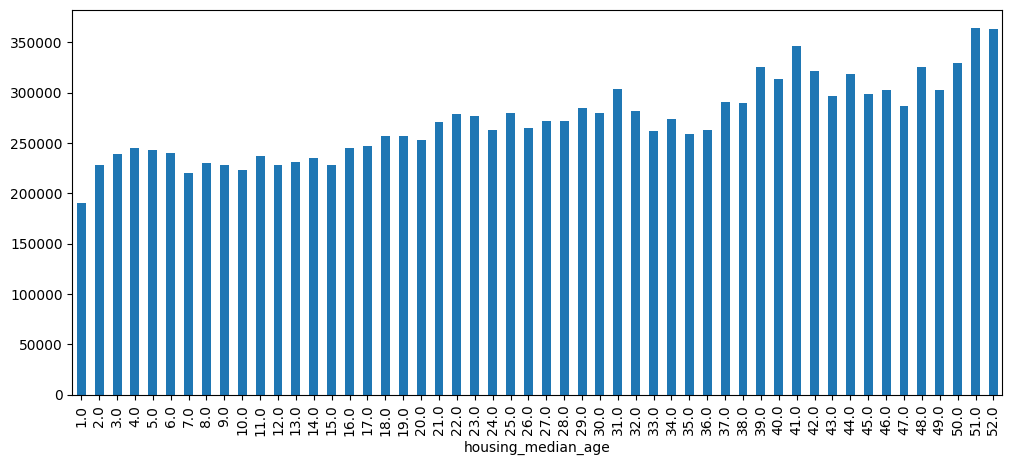

In [20]:
result.plot.bar(figsize=(12, 5))

## 4. Tips and Tricks
- Converting from and to a pandas dataframe
- Check the optimized query and non-optimized query
- Check fallbacks

In [21]:
# Converting from and to a pandas dataframe
pandas_df = df.to_pandas()
fireducks_df_from_pandas = pd.from_pandas(pandas_df)

display(pandas_df.head(), fireducks_df_from_pandas.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [22]:
# Load the fireducks extension
%load_ext fireducks.pandas

The fireducks.pandas extension is already loaded. To reload it, use:
  %reload_ext fireducks.pandas


In [23]:
import pandas as pd
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
type(df)

fireducks.pandas.frame.DataFrame

In [24]:
# Check the query plan before and after optimizations
%%fireducks._verbose

result = (
      df
      .query(f"median_income > {income_median}")
      .query("total_rooms / households > 5")
      .groupby('housing_median_age')['median_house_value']
      .mean()
)

result

housing_median_age
1.0     190250.000000
2.0     227788.972222
3.0     239217.550000
4.0     245006.639344
5.0     242662.650407
6.0     240314.735294
7.0     220451.811765
8.0     230158.968421
9.0     228236.191489
10.0    223188.836207
11.0    237172.096774
12.0    228402.206522
13.0    231522.424000
14.0    234951.430168
15.0    227769.060914
16.0    245267.106707
17.0    246882.972222
18.0    256552.200957
19.0    257310.785714
20.0    252763.937500
21.0    270461.895833
22.0    278298.592308
23.0    276343.515723
24.0    262815.382353
25.0    280063.062500
26.0    264881.264957
27.0    271864.565789
28.0    271327.012500
29.0    284418.934426
30.0    279801.688000
31.0    303583.807692
32.0    281784.463855
33.0    261998.700461
34.0    273378.678571
35.0    259186.912226
36.0    262717.125698
37.0    290350.151316
38.0    289233.464646
39.0    325791.265823
40.0    313673.436620
41.0    346327.291667
42.0    321758.623377
43.0    296181.318841
44.0    318513.043011
45.0    29897

In [25]:
# Inspect fallbacks
%%fireducks.profile

result = (
      df
      .query(f"median_income > {income_median}")
      .query("total_rooms / households > 5")
      .groupby('housing_median_age')['median_house_value']
      .mean()
)

result

housing_median_age
1.0     190250.000000
2.0     227788.972222
3.0     239217.550000
4.0     245006.639344
5.0     242662.650407
6.0     240314.735294
7.0     220451.811765
8.0     230158.968421
9.0     228236.191489
10.0    223188.836207
11.0    237172.096774
12.0    228402.206522
13.0    231522.424000
14.0    234951.430168
15.0    227769.060914
16.0    245267.106707
17.0    246882.972222
18.0    256552.200957
19.0    257310.785714
20.0    252763.937500
21.0    270461.895833
22.0    278298.592308
23.0    276343.515723
24.0    262815.382353
25.0    280063.062500
26.0    264881.264957
27.0    271864.565789
28.0    271327.012500
29.0    284418.934426
30.0    279801.688000
31.0    303583.807692
32.0    281784.463855
33.0    261998.700461
34.0    273378.678571
35.0    259186.912226
36.0    262717.125698
37.0    290350.151316
38.0    289233.464646
39.0    325791.265823
40.0    313673.436620
41.0    346327.291667
42.0    321758.623377
43.0    296181.318841
44.0    318513.043011
45.0    29897

,name,type,n_calls,duration (msec)
0,Series.__repr__,fallback,1,3.787377
1,to_pandas.frame.metadata,kernel,1,1.430994
2,filter,kernel,2,0.944061
3,groupby_select_agg,kernel,1,0.422494
4,gt.vector.scalar,kernel,2,0.281469
5,truediv.vector.vector,kernel,1,0.098511
6,project,kernel,5,0.050456
7,getattr:_repr_intrinsic_type_,fallback,1,0.025052
8,getattr:__repr__,fallback,1,0.009881
9,get_shape,kernel,1,0.001015
